**Logistic Regression**

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6682 - loss: 0.6463 - val_accuracy: 0.6591 - val_loss: 0.6569
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6632 - loss: 0.6286 - val_accuracy: 0.6818 - val_loss: 0.6400
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6838 - loss: 0.6107 - val_accuracy: 0.6932 - val_loss: 0.6267
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7231 - loss: 0.5977 - val_accuracy: 0.6894 - val_loss: 0.6148
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7092 - loss: 0.5840 - val_accuracy: 0.6970 - val_loss: 0.6056
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5849 - val_accuracy: 0.7008 - val_loss: 0.5971
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6858 - loss: 0.5921 - val_accuracy: 0.7083 - val_loss: 0.5901
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7105 - loss: 0.5587 - val_accuracy: 0.7235 - val_loss:

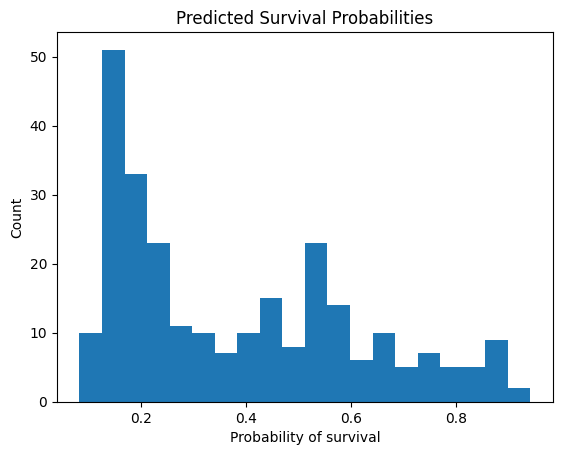

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']


# One-hot encode categorical features
dftrain = pd.get_dummies(dftrain, columns=CATEGORICAL_COLUMNS)
dfeval = pd.get_dummies(dfeval, columns=CATEGORICAL_COLUMNS)

# Make sure train/eval have the same columns
dftrain, dfeval = dftrain.align(dfeval, join="left", axis=1, fill_value=0)

# Scale numeric features
scaler = StandardScaler()
dftrain[NUMERIC_COLUMNS] = scaler.fit_transform(dftrain[NUMERIC_COLUMNS])
dfeval[NUMERIC_COLUMNS] = scaler.transform(dfeval[NUMERIC_COLUMNS])

X_train = dftrain.values.astype(np.float32)
X_eval = dfeval.values.astype(np.float32)


model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid')  # logistic regression
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_eval, y_eval),
    epochs=50,
    batch_size=32,
    verbose=1
)


loss, acc = model.evaluate(X_eval, y_eval, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

y_pred = model.predict(X_eval).flatten()

import matplotlib.pyplot as plt

plt.hist(y_pred, bins=20)
plt.title("Predicted Survival Probabilities")
plt.xlabel("Probability of survival")
plt.ylabel("Count")
plt.show()


**Linear Regression**

Epoch 1/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0446 - mae: 0.9006 - val_loss: 0.8686 - val_mae: 0.8176
Epoch 2/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8479 - mae: 0.8143 - val_loss: 0.7581 - val_mae: 0.7629
Epoch 3/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7459 - mae: 0.7494 - val_loss: 0.6708 - val_mae: 0.7144
Epoch 4/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6666 - mae: 0.7151 - val_loss: 0.6032 - val_mae: 0.6746
Epoch 5/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5852 - mae: 0.6597 - val_loss: 0.5501 - val_mae: 0.6407
Epoch 6/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5401 - mae: 0.6408 - val_loss: 0.5050 - val_mae: 0.6108
Epoch 7/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5201 - mae: 0.6267 - val_loss: 0.4670 - val_mae: 0.5857
Epoch 8/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4483 - mae: 0.5849 - val_loss: 0.4356 - val_mae: 0.5637
Epoch 9/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4328 - mae:

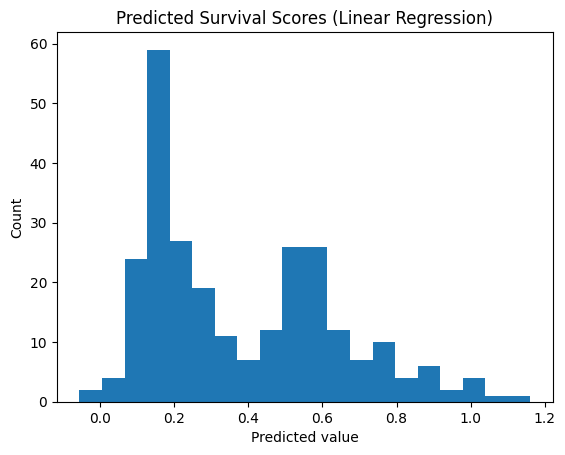

Classification Accuracy (threshold 0.5): 0.7841


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

# One-hot encode categorical features
dftrain = pd.get_dummies(dftrain, columns=CATEGORICAL_COLUMNS)
dfeval = pd.get_dummies(dfeval, columns=CATEGORICAL_COLUMNS)

# Make sure train/eval have the same columns
dftrain, dfeval = dftrain.align(dfeval, join="left", axis=1, fill_value=0)

# Scale numeric features
scaler = StandardScaler()
dftrain[NUMERIC_COLUMNS] = scaler.fit_transform(dftrain[NUMERIC_COLUMNS])
dfeval[NUMERIC_COLUMNS] = scaler.transform(dfeval[NUMERIC_COLUMNS])


X_train = dftrain.values.astype(np.float32)
X_eval = dfeval.values.astype(np.float32)


model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(1)  # linear regression, no activation
])

model.compile(
    optimizer='adam',
    loss='mse',           # Mean Squared Error
    metrics=['mae']       # Mean Absolute Error
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_eval, y_eval),
    epochs=40,
    batch_size=32,
    verbose=1
)


loss, mae = model.evaluate(X_eval, y_eval, verbose=0)
print(f"Test MAE: {mae:.4f}")


y_pred = model.predict(X_eval).flatten()

plt.hist(y_pred, bins=20)
plt.title("Predicted Survival Scores (Linear Regression)")
plt.xlabel("Predicted value")
plt.ylabel("Count")
plt.show()

# If you want to force classification from linear regression:
y_class = (y_pred >= 0.5).astype(int)
accuracy = np.mean(y_class == y_eval)
print(f"Classification Accuracy (threshold 0.5): {accuracy:.4f}")
